### Network Analysis of a Social-Network Dataset

#### 1 Data understanding for the social-network dataset

At a first stage, we will load the files to build the network:

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

# Crear un grafo vacío
G = nx.Graph()

# Leer el archivo de aristas (edges) y agregar las conexiones al grafo
with open('12831.edges', 'r') as f_edges:
    for line in f_edges:
        source, target = line.strip().split()
        G.add_edge(source, target)

# Leer el archivo de características (feat) y agregar las características a los nodos
with open('12831.feat', 'r') as f_feat:
    for line in f_feat:
        node, *features = map(int, line.strip().split())
        G.add_node(node, features=features)

# Leer el archivo de características ego (egofeat) y agregarlas al nodo ego
with open('12831.egofeat', 'r') as f_egofeat:
    features = list(map(int, f_egofeat.readline().strip().split()))
    if G.has_node('ego'):
        G.nodes['ego']['features'] = features

# Leer el archivo de círculos (circles) y agregar las relaciones entre nodos a los grupos
with open('12831.circles', 'r') as f_circles:
    for line in f_circles:
        circle, *nodes = line.strip().split()
        for node in nodes:
            if G.has_node(node):
                G.nodes[node]['circle'] = circle



In [42]:
# Ahora tienes un grafo G con nodos, aristas y características asociadas. Puedes realizar análisis de grafos, aprendizaje automático u otras tareas según sea necesario.
degrees = [G.degree[node] for node in G.nodes()]
degrees


[2,
 47,
 14,
 31,
 33,
 44,
 48,
 24,
 26,
 8,
 18,
 33,
 21,
 8,
 6,
 15,
 21,
 37,
 12,
 23,
 59,
 30,
 27,
 21,
 21,
 36,
 14,
 31,
 14,
 31,
 33,
 6,
 52,
 38,
 30,
 28,
 28,
 9,
 12,
 22,
 41,
 16,
 11,
 25,
 16,
 16,
 29,
 46,
 33,
 18,
 14,
 4,
 7,
 17,
 3,
 3,
 9,
 28,
 11,
 26,
 7,
 8,
 17,
 12,
 13,
 7,
 12,
 6,
 46,
 13,
 6,
 40,
 49,
 20,
 12,
 12,
 17,
 22,
 26,
 47,
 28,
 11,
 29,
 8,
 6,
 4,
 17,
 8,
 11,
 20,
 30,
 20,
 44,
 15,
 5,
 9,
 28,
 16,
 41,
 31,
 16,
 38,
 27,
 34,
 24,
 39,
 5,
 19,
 5,
 18,
 6,
 28,
 37,
 13,
 27,
 31,
 3,
 2,
 23,
 21,
 29,
 5,
 4,
 32,
 21,
 21,
 32,
 16,
 9,
 15,
 35,
 8,
 15,
 11,
 12,
 17,
 46,
 11,
 4,
 14,
 21,
 14,
 12,
 10,
 24,
 4,
 11,
 6,
 19,
 8,
 23,
 19,
 7,
 8,
 18,
 5,
 11,
 13,
 10,
 5,
 11,
 8,
 5,
 7,
 8,
 16,
 11,
 4,
 13,
 10,
 14,
 5,
 7,
 20,
 6,
 8,
 4,
 1,
 5,
 3,
 18,
 3,
 14,
 1,
 5,
 8,
 6,
 5,
 10,
 7,
 1,
 19,
 7,
 4,
 6,
 14,
 3,
 6,
 11,
 2,
 8,
 11,
 11,
 5,
 2,
 4,
 3,
 4,
 3,
 10,
 1,
 2,
 2,
 4,
 3,
 4,

Text(0.5, 0, 'Clustering coefficient.')

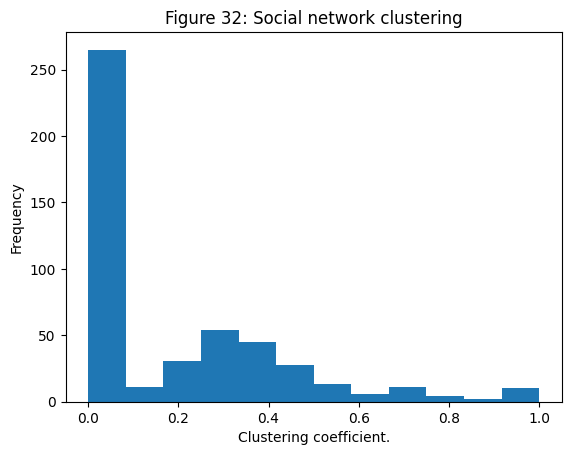

In [43]:
cc = nx.clustering(G)
plt.hist(list(cc.values()),bins='auto')
plt.ylabel("Frequency")
plt.title("Figure 32: Social network clustering")
plt.xlabel("Clustering coefficient.")


In [44]:
bc = nx.betweenness_centrality(G)
dict(sorted(bc.items(), key= lambda kv: kv[1], reverse=True))



{'180505807': 0.023575351061264377,
 '1678471': 0.010710404651124598,
 '1186': 0.010372564886648792,
 '1260231': 0.009935694448501634,
 '883301': 0.008803309155753435,
 '22253': 0.008697684788254794,
 '174958347': 0.008450035196004109,
 '5854882': 0.007353572168304888,
 '57378470': 0.006590852390997637,
 '67157376': 0.006414254245959922,
 '586': 0.005870316525073343,
 '14231571': 0.00582279157399657,
 '652193': 0.005783742864779052,
 '8630562': 0.005575086036012746,
 '713263': 0.005234318946546302,
 '1566521': 0.0051952521779489265,
 '380': 0.005179717123665008,
 '15384741': 0.005059506977767038,
 '528': 0.004963284010691345,
 '15583257': 0.0048909466979560785,
 '20904050': 0.004873510252586998,
 '2735631': 0.004523633053652671,
 '9283582': 0.004376430186398564,
 '20554406': 0.004238126527848656,
 '761': 0.004205068417488628,
 '8479062': 0.0040975737705900616,
 '19507576': 0.0040443392353316275,
 '14749606': 0.003990313998926902,
 '668423': 0.003945456882117483,
 '11178592': 0.00371354

In [45]:
ac = nx.degree_assortativity_coefficient(G)
ac

0.12124663824327542

In [46]:
# Get the number of connected components in the network
num_connected_components = nx.number_connected_components(G)

print("Number of connected components:", num_connected_components)

Number of connected components: 246


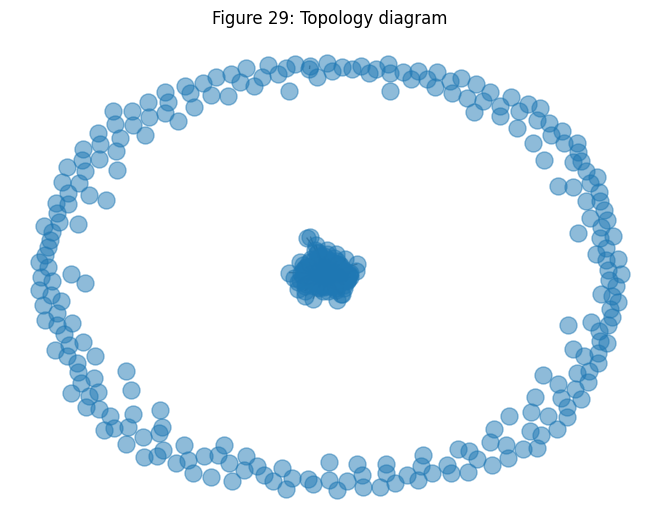

In [47]:

#Visualizing the social network / topology diagram
layout = nx.spring_layout(G)
nx.draw(G,pos=layout,node_size=150,alpha=0.5)
plt.title("Figure 29: Topology diagram")
plt.show()

In [50]:


# Encuentra los componentes conectados
connected_components = list(nx.connected_components(G))

# Encuentra el componente principal (el más grande)
main_component = max(connected_components, key=len)

# Crear un nuevo grafo solo con el componente principal
main_graph = G.subgraph(main_component).copy()

# Ahora main_graph contiene solo el componente principal de tu red.

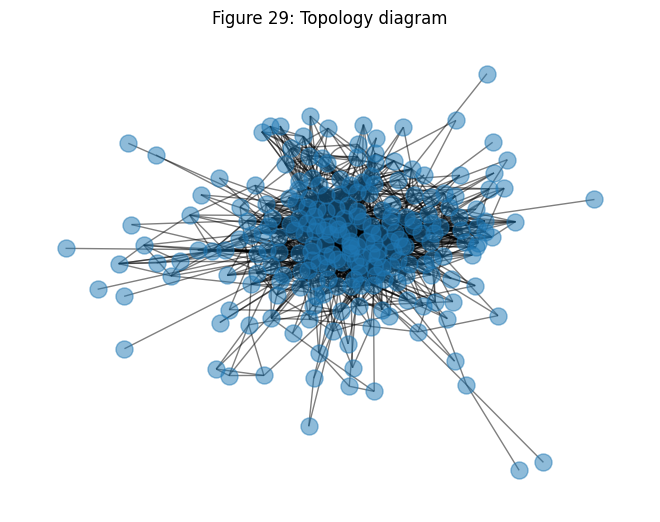

In [57]:

#Visualizing the social network / topology diagram
layout = nx.spring_layout(main_graph)
nx.draw(main_graph,pos=layout,node_size=150,alpha=0.5)
plt.title("Figure 29: Topology diagram")
plt.show()

In [59]:
bc = nx.betweenness_centrality(main_graph)
dict(sorted(bc.items(), key= lambda kv: kv[1], reverse=True))

{'180505807': 0.09985680645421803,
 '1678471': 0.045365466733217244,
 '1186': 0.04393449758725914,
 '1260231': 0.04208406971137029,
 '883301': 0.037287688155239335,
 '22253': 0.036840300882203546,
 '174958347': 0.035791345244699804,
 '5854882': 0.031147117633554523,
 '57378470': 0.027916507790950132,
 '67157376': 0.02716850082624456,
 '586': 0.02486457400129206,
 '14231571': 0.024663275202852664,
 '652193': 0.024497878751767458,
 '8630562': 0.023614082599111113,
 '713263': 0.022170714345107544,
 '1566521': 0.02200524140090911,
 '380': 0.02193944043341325,
 '15384741': 0.021430272988077106,
 '528': 0.021022706705192972,
 '15583257': 0.02071631156314599,
 '20904050': 0.020642456978925992,
 '2735631': 0.019160501539707386,
 '9283582': 0.01853700252216569,
 '20554406': 0.017951197389175732,
 '761': 0.017811174985293592,
 '8479062': 0.01735586587357261,
 '19507576': 0.01713038330620098,
 '14749606': 0.01690155160985461,
 '668423': 0.01671155280900147,
 '11178592': 0.015729275081277166,
 '63

In [60]:
cc = nx.clustering(main_graph)
cc

{'713263': 0.22727272727272727,
 '563200400': 0.14705882352941177,
 '10044992': 0,
 '1678471': 0.17496443812233287,
 '21145764': 0.4,
 '19094625': 0.19696969696969696,
 '13462502': 0.2621082621082621,
 '22229621': 0,
 '668423': 0.3333333333333333,
 '6001592': 0.19367588932806323,
 '19327052': 0.5,
 '17129553': 0.3142857142857143,
 '15109716': 0.2647058823529412,
 '15236339': 0.3333333333333333,
 '20904050': 0.2735632183908046,
 '8003822': 0.5906432748538012,
 '14471007': 0.22727272727272727,
 '9616792': 0.3416666666666667,
 '14178728': 0.3888888888888889,
 '305888449': 0.6,
 '25583917': 0.4,
 '377821426': 0.47435897435897434,
 '15540222': 0.2553846153846154,
 '1566521': 0.24955436720142601,
 '606083': 0.3333333333333333,
 '29294520': 0.2896551724137931,
 '155696919': 0.6666666666666666,
 '5634142': 0.42424242424242425,
 '14202817': 0,
 '33633793': 0,
 '136865608': 0.2,
 '16215038': 0.4666666666666667,
 '652193': 0.2858464384828862,
 '15384741': 0.3190883190883191,
 '19223': 0.446640316

In [58]:
ac = nx.degree_assortativity_coefficient(main_graph)
ac

0.11967578238344916